# Project #1, Part 3: Data Analysis and Visualization
## Dylan Cortegana 10/13/2025
### Data analysis and visualization of the cleaned, Non-Majors Survery Results with Matplotlib
### Questions: 
##### How does the race/ethnicity relate to the aspects which impacted students decision to go to CCM?
##### What are the top activities or experiences which impacted students decision to enroll in a computing course at CCM?
##### What are the top ways people heard about CCM?
##### What are the top events at CCM that students participated in?

## Imports

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

## Data loading

In [137]:
survey = pd.read_csv(r"cleanSurvey.csv")

## Data Head
#### Displays first few rows of the survey dataframe

In [138]:
survey.head()

,motivation_required_class,motivation_computing_skills,motivation_career_advancement,motivation_career_change,motivation_professional_development,motivation_job_displacement,motivation_relocation,motivation_certifications,motivation_financial,motivation_personal_enrichment,...,decision_family_friend_referral,decision_faculty_staff,decision_college_reputation,decision_scholarships,decision_transfer_student,decision_small_class_sizes,decision_extracurricular_opportunities,gender,race_ethnicity,age
0,No,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,...,High Impact,Some Impact,High Impact,High Impact,High Impact,No Impact,No Impact,Prefer not to say,Hispanic or Latino;Black/African American;Whit...,19-20
1,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,...,High Impact,High Impact,High Impact,High Impact,NaN,High Impact,High Impact,Woman,Hispanic or Latino,19-20
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,...,No Impact,No Impact,No Impact,NaN,No Impact,No Impact,No Impact,Man,Choose not to reply,18 and younger
3,No,Yes,No,No,No,No,No,No,No,No,...,High Impact,Some Impact,No Impact,No Impact,No Impact,No Impact,No Impact,Man,Hispanic or Latino,19-20
4,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,...,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact,Woman,White/Caucasian,19-20


## Question 1 

#### How does the race/ethnicity relate to the aspects which impacted students decision to go to CCM?

### Visualization

To visualize the data, I will be using horizontal bar graphs to display the amount of students of each race impacted by each factor. To reduce clutter and make each factor visibly clear, I will be using 5 seperate bar graphs, instead of one graph with each set of bars on it. Also, I will not be using subplots as each plot will be hard to see, since there are 5

#### Defining a dataframe with only the decision columns and the race/ethnicity column

On top of extracting the columns needed for the visualization from the survey, I am dropping any row with NA. This is because I can not replace the NA values with any data that could be useful for my study without compromising the integrity or shifting the actual results. For exmaple, I can not fill in a race for a student who put NA as their answer to the race/ethnicity question. This applies to every proceeding question.

In [139]:
decisions = survey[[col for col in survey.columns if "decision_" in col] + ["race_ethnicity"]] #Selects all columns that have decision in them
decisions = decisions.copy().drop('events_instant_decision_day', axis=1) #Creates copy of the dataframe as to not affect the original, drops extra column
decisions.dropna(inplace = True) #Removing rows with NA
decisions.head() #displays the first few rows of decisions

,decision_affordable_cost,decision_location_convenience,decision_program_choice,decision_online_offerings,decision_family_friend_referral,decision_faculty_staff,decision_college_reputation,decision_scholarships,decision_transfer_student,decision_small_class_sizes,decision_extracurricular_opportunities,race_ethnicity
0,High Impact,High Impact,High Impact,High Impact,High Impact,Some Impact,High Impact,High Impact,High Impact,No Impact,No Impact,Hispanic or Latino;Black/African American;Whit...
3,Some Impact,High Impact,Some Impact,No Impact,High Impact,Some Impact,No Impact,No Impact,No Impact,No Impact,No Impact,Hispanic or Latino
4,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact,White/Caucasian
5,Some Impact,Some Impact,Some Impact,High Impact,High Impact,High Impact,High Impact,Some Impact,High Impact,No Impact,No Impact,White/Caucasian
7,Some Impact,No Impact,High Impact,No Impact,High Impact,No Impact,Some Impact,No Impact,No Impact,High Impact,No Impact,Hispanic or Latino;Black/African American


#### Defining 5 dataframes from the decision columns that have each race

In [140]:
hispanic_decisions = decisions[decisions["race_ethnicity"].str.contains("Hispanic")] 
asian_decisions = decisions[decisions["race_ethnicity"].str.contains("Asian")] 
caucasian_decisions = decisions[decisions["race_ethnicity"].str.contains("Caucasian")] 
indian_decisions = decisions[decisions["race_ethnicity"].str.contains("Indian")] 
black_decisions = decisions[decisions["race_ethnicity"].str.contains("Black")]
#Checks each row to see if the "race_ethnicity" contains 1 of 5 races
#If the row does have one of those races, the mask returns true and keeps the row
#If not, the row is dropped

#Shape of the dataframes before and after
print("Original: ", decisions.shape)
print("Hispanic: ", hispanic_decisions.shape)
print("Asian: ", asian_decisions.shape)
print("Caucasian: ", caucasian_decisions.shape)
print("Indian: ", indian_decisions.shape)
print("Black: ", black_decisions.shape)

Original:  (73, 12)
Hispanic:  (26, 12)
Asian:  (6, 12)
Caucasian:  (45, 12)
Indian:  (1, 12)
Black:  (9, 12)


#### Plots for each race

Text(0.5, 1.0, 'Decision Factors Impact for Hispanic Students')

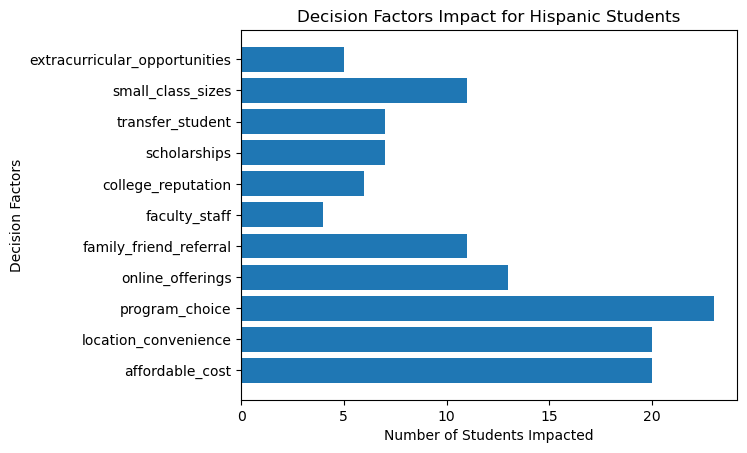

In [141]:
plt.barh( [col[9:] for col in decisions.columns if "decision_" in col], #Selects every column except the race column for the y labels
          [(hispanic_decisions[col].str.contains("High")).sum() for col in decisions.columns if "decision_" in col])
#The above uses a mask and .sum() to find the amount of rows have "High Impact" for each decision column
plt.xlabel("Number of Students Impacted")
plt.ylabel("Decision Factors")
plt.title("Decision Factors Impact for Hispanic Students")

### The above bar graph was repeated for each race

Text(0.5, 1.0, 'Decision Factors Impact for Asian Students')

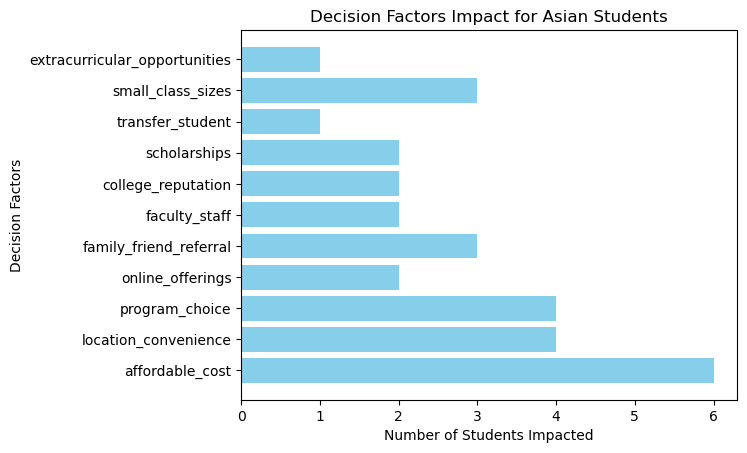

In [142]:
plt.barh( [col[9:] for col in decisions.columns if "decision_" in col], 
          [(asian_decisions[col].str.contains("High")).sum() for col in decisions.columns if "decision_" in col], color='skyblue')
plt.xlabel("Number of Students Impacted")
plt.ylabel("Decision Factors")
plt.title("Decision Factors Impact for Asian Students")

Text(0.5, 1.0, 'Decision Factors Impact for Caucasian Students')

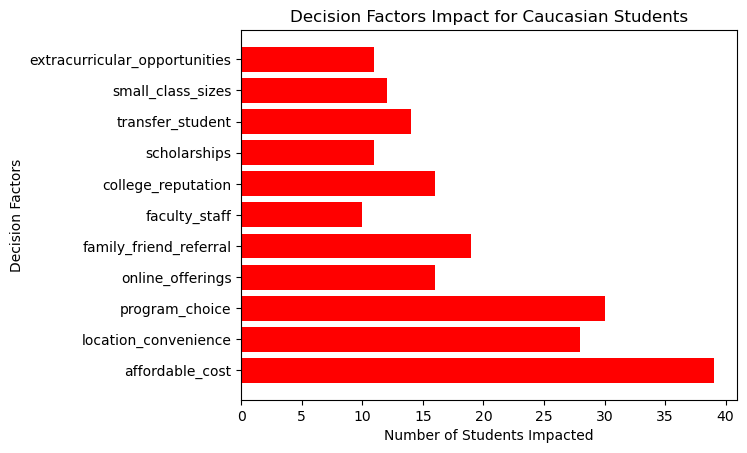

In [143]:
plt.barh( [col[9:] for col in decisions.columns if "decision_" in col], 
          [(caucasian_decisions[col].str.contains("High")).sum() for col in decisions.columns if "decision_" in col], color='red')
plt.xlabel("Number of Students Impacted")
plt.ylabel("Decision Factors")
plt.title("Decision Factors Impact for Caucasian Students")

Text(0.5, 1.0, 'Decision Factors Impact for American Indian Students')

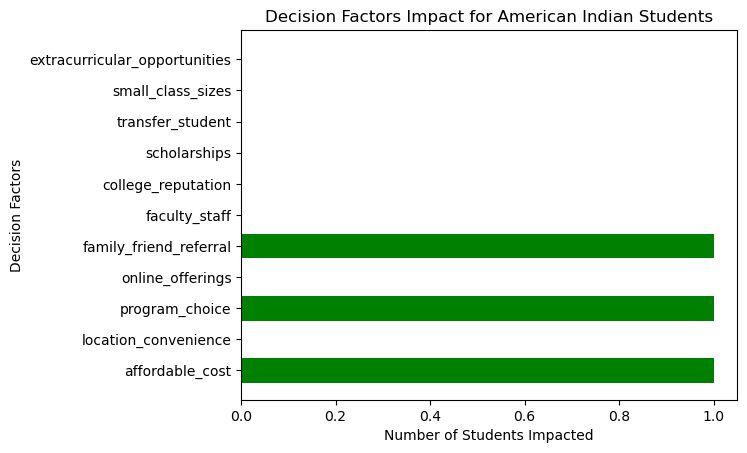

In [144]:
plt.barh( [col[9:] for col in decisions.columns if "decision_" in col], 
          [(indian_decisions[col].str.contains("High")).sum() for col in decisions.columns if "decision_" in col], color='green')
plt.xlabel("Number of Students Impacted")
plt.ylabel("Decision Factors")
plt.title("Decision Factors Impact for American Indian Students")

Text(0.5, 1.0, 'Decision Factors Impact for African American Students')

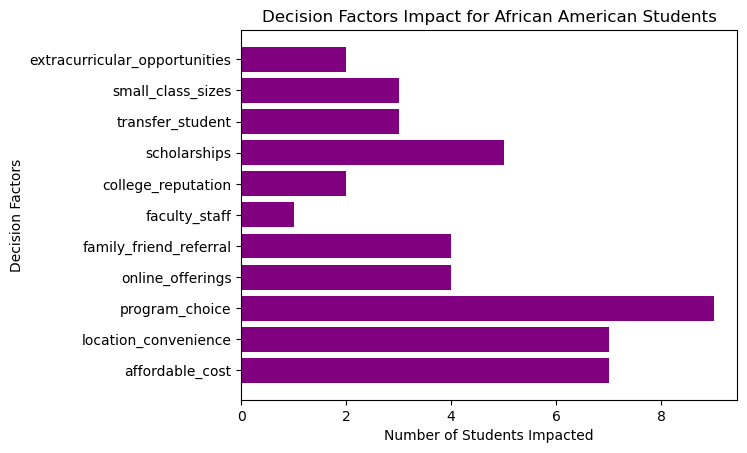

In [145]:
plt.barh( [col[9:] for col in decisions.columns if "decision_" in col], 
          [(black_decisions[col].str.contains("High")).sum() for col in decisions.columns if "decision_" in col], color='Purple')
plt.xlabel("Number of Students Impacted")
plt.ylabel("Decision Factors")
plt.title("Decision Factors Impact for African American Students")

### Analysis and Conclusion

As shown by the five bar graphs above, the decision factor that impacted the most students across all the races was affordable cost and program choice. Specifically, African American students and Hispanic Students were impacted the most by the availability of programs. So, to better target those groups of students, the various program offerings of CCM should be advertised often.

Also, the affordable cost of CCM is shown to be a big decision factor for Caucasian and Asian students. To target those groups for enrollment, the cost of the school should be emphasized in outreach campaigns and more. The cost and opportunities compared to other institutions should be clearly commuinicated to highschoolers and other potential students.

## Question 2

#### What are the top activities or experiences which impacted students decision to enroll in a computing course at CCM?

### Visualization
To answer this question, I will create a bar graph of each activity/experience that CCM holds and how many students said that it impacted their enrollment decision. 

#### Defining a dataframe with only the influences (activites/experiences) that students had before enrolling 

In [146]:
influences = survey[[col for col in survey.columns if "influence_" in col]] #Creates a new dataframe with the columns that have the influences
influences = influences.copy() #Creates copy of the dataframe as to not affect the original
influences.head() #Displays the first few rows of the new influences dataframe

,influence_hs_computing_class,influence_hs_computing_club,influence_computing_competitions,influence_afterschool_program,influence_summer_camp,influence_ap_computing_class,influence_dual_enrollment,influence_family_friend,influence_family_friend_in_field,influence_teacher_counselor,influence_employer
0,No Impact,No Impact,High Impact,NaN,NaN,NaN,NaN,Some Impact,NaN,High Impact,NaN
1,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact
2,NaN,NaN,No Impact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact
4,Some Impact,No Impact,NaN,NaN,NaN,NaN,NaN,Some Impact,NaN,NaN,Some Impact


#### Creating a bar graph with the new dataframe

Text(0.5, 1.0, 'Influence of Experiences and Acitvities on Enrolled Students')

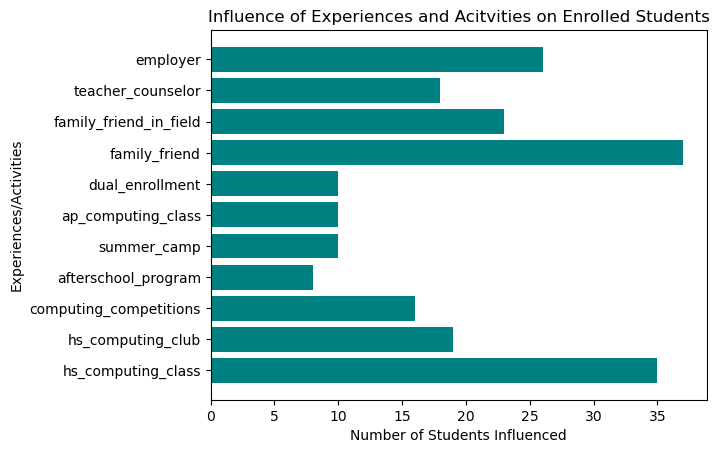

In [147]:
plt.barh([col[10:] for col in influences.columns if "influence_" in col], #Creates a list of the influences in the dataframe (columns)
        [(influences[col].str.contains("High")).sum() + (influences[col].str.contains("Some")).sum() for col in influences.columns], color="teal")
#The above creates a list of the number of people who put "High Impact" or "Some Impact" for each of the influences listed prior
plt.xlabel("Number of Students Influenced")
plt.ylabel("Experiences/Activities")
plt.title("Influence of Experiences and Acitvities on Enrolled Students")

### Analysis

The top influences for people enrolling into CCM were highschool computing classes, family friends, and employers. As a way of targeting potential students in highschoolers, CCM should invest in highschools across Morris County and create or visit computing classes, as these classes were one of the most influential for enrolled students. Also, CCM can collaborate with buisnesses and employers on internships, job fairs, and clear career pathways for higschoolers that enroll in CCM. 

## Question 3

#### What are the top ways people heard about CCM?

### Visualization

To visualize the ways people heard about CCM, I am going to create a bar graph that has the ways people heard about CCM and the amount of students who heard about CCM through each method of advertising.

#### Defining a dataframe with only the ways enrolled students heard about CCM

In [148]:
heard = survey[[col for col in survey.columns if "heard_" in col]]
heard = heard.copy() #Creates copy of the dataframe as to not affect the original
heard.dropna(inplace = True) #Removing rows with NA
heard.head() #displays the first few rows of decisions

,heard_ccm_website,heard_billboard,heard_television,heard_radio,heard_social_media,heard_community_event,heard_family_friend,heard_employer,heard_current_student,heard_alumni,heard_high_school
0,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes
1,Yes,No,No,No,Yes,No,Yes,No,Yes,No,No
2,Yes,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,Yes,No,Yes,Yes,Yes
4,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes


#### Creating a bar graph with the new dataframe

Text(0.5, 1.0, 'How Students Heard About CCM')

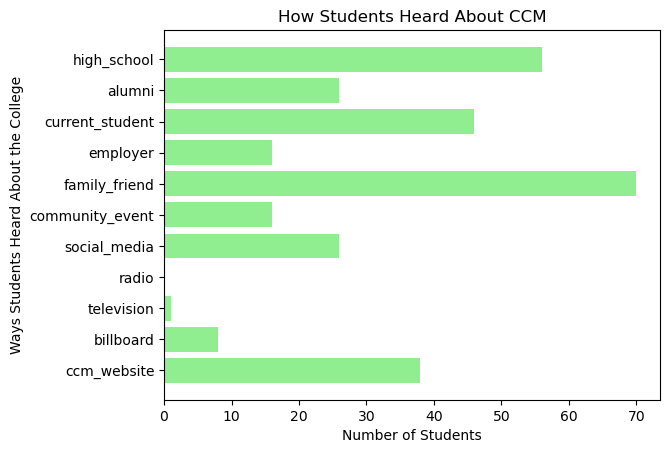

In [149]:
plt.barh([col[6:] for col in heard.columns], #Creates a list of the columns in the dataframe
        [(heard[col].str.contains("Yes")).sum() for col in heard.columns], color="lightgreen")
#The above creates a list of the number of people who put "Yes" for each of the columns listed prior
plt.xlabel("Number of Students")
plt.ylabel("Ways Students Heard About the College")
plt.title("How Students Heard About CCM")

#### I am also including a graph of the students that answered "No" to each way they could have heard about CCM

Text(0.5, 1.0, 'How Students Did Not Hear About CCM')

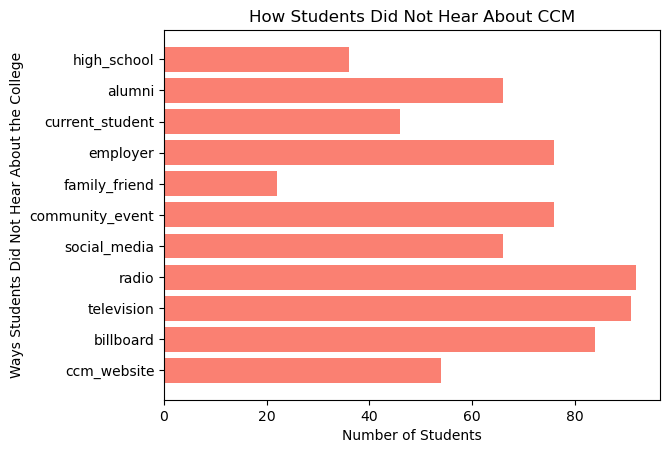

In [150]:
plt.barh([col[6:] for col in heard.columns], #Creates a list of the columns in the dataframe
        [(heard[col].str.contains("No")).sum() for col in heard.columns],color="salmon")
#The above creates a list of the number of people who put "No" for each of the columns listed prior
plt.xlabel("Number of Students")
plt.ylabel("Ways Students Did Not Hear About the College")
plt.title("How Students Did Not Hear About CCM")

### Analysis

The top ways that enrolled students heard about CCM were through a family friend, highschool, and current students. Because of this, CCM should do more outreach with high schools and have representative visit these highschools often. Also, hosting information nights or families and communities could work to promote CCM further. Since most students said "No" to hearing about CM through radio, television, and billboard, these efforts should either be stopped or increased drastically to achieve the reach that other efforts do.

## Question 4

#### What are the top events at CCM that students participated in?

### Visualization

To visualize the amount of students who participated at events at CCM, I will use a bar graph that displays the different events at CCM and the amount of students that reported participating in them.

#### Defining a dataframe with only the events columns


In [151]:
events = survey[[col for col in survey.columns if "events_" in col]]
events = events.copy() #Creates copy of the dataframe as to not affect the original
events.dropna(inplace = True) #Removing rows with NA
events.head() #displays the first few rows of events

,events_open_house,events_instant_decision_day,events_information_session,events_virtual_information_session,events_women_who_dare,events_regional_college_fair
0,Yes,Yes,No,No,No,Yes
1,No,No,No,No,No,No
2,Not Sure,Not Sure,Not Sure,Not Sure,Not Sure,Not Sure
3,Yes,No,No,No,No,No
4,No,No,No,No,No,No


Text(0.5, 1.0, 'Number of Students that Attended Events at CCM')

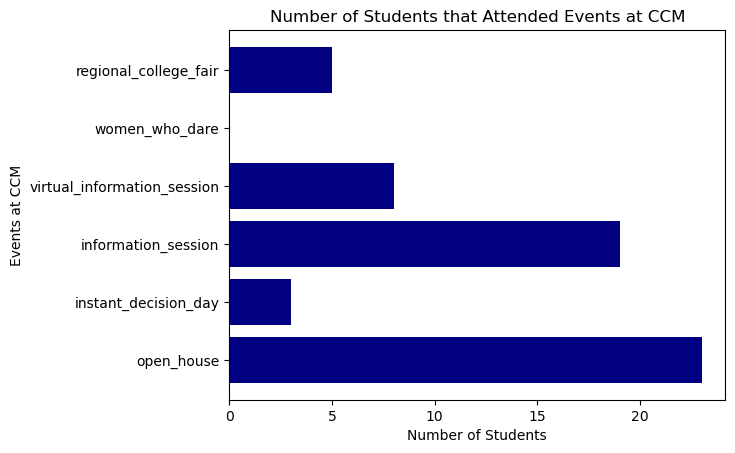

In [152]:
plt.barh([col[7:] for col in events.columns], #Creates a list of the columns in the dataframe
        [(events[col].str.contains("Yes")).sum() for col in events.columns],color="navy")
#The above creates a list of the number of people who put "No" for each of the columns listed prior
plt.xlabel("Number of Students")
plt.ylabel("Events at CCM")
plt.title("Number of Students that Attended Events at CCM")

### Analysis

The most popular events attended at CCM were the open house, information session, and virtual information session. Because of this, CCM should promote these events more and market them on social media and other platforms. CCM should also esnure that these events are engaging and informative for students who attend. Because Women Who Dare and Instant Decision Day are the least attended, CCM should promote them more along with the events that are more popular